# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**. 

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 7th, 23:00 h; Group B: November 14th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [1]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.util import img_as_float, random_noise, img_as_ubyte
from skimage.color import rgb2gray
from skimage.filters import sobel, threshold_otsu
from skimage.segmentation import felzenszwalb, slic, quickshift, mark_boundaries
from skimage.transform import resize
from skimage.feature import canny
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction import image
from skimage import img_as_float
from skimage.exposure import histogram

%matplotlib inline

## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'barcelona.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

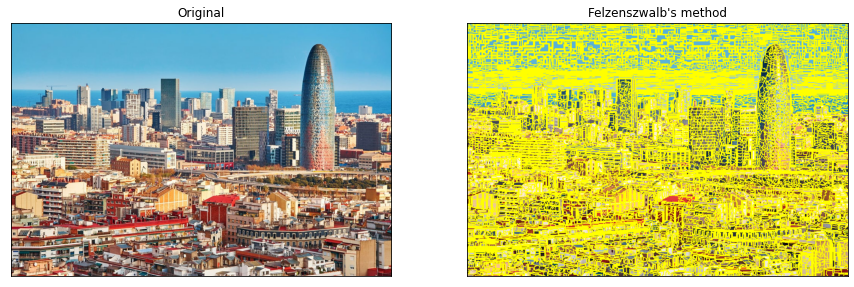

In [2]:
barcelona_im = io.imread("images_notebook/barcelona.jpeg")

# Apply Felzenszwalb method
segments_fz = felzenszwalb(barcelona_im)

# Create subplots for Original and Felzenszwalb images
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(barcelona_im)
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Show the segmented image
axs[1].imshow(mark_boundaries(barcelona_im, segments_fz))
axs[1].set_title("Felzenszwalb's method")
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

"""
Using the felzenszwalb algorithm, we can see that the image is segmented in a lot of regions, this is because we are not providing any parameter to the algorithm, so it is using the default values.
The felzenszwalb algorithm is based on a graph representation of the image, where the nodes are the pixels and the edges are the similarity between pixels. The algorithm uses a greedy strategy to merge the nodes, so the regions are formed by pixels that are similar to each other.
If we want to reduce the number of regions, we can use the parameter scale, which is the parameter that controls the size of the regions. If we increase the value of scale, the regions will be bigger, so the number of regions will be smaller.
"""


b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?
- Does the image reduction affect the optimal values? 

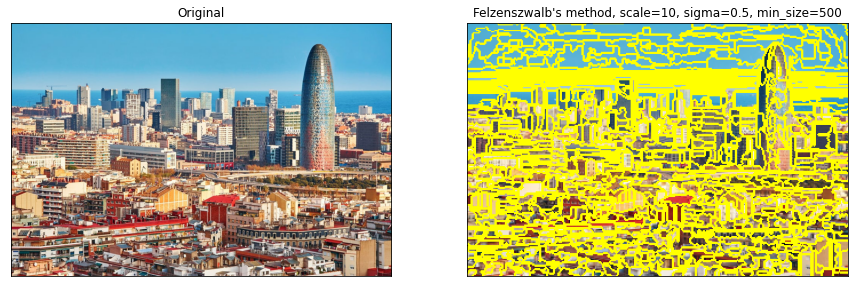

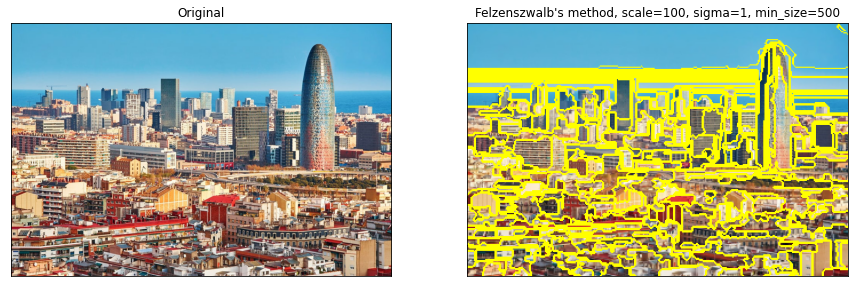

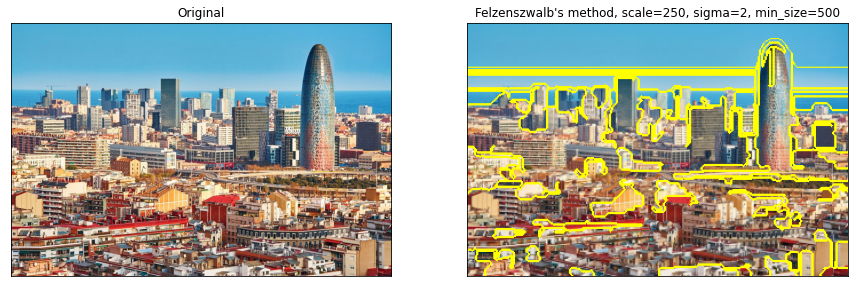

In [3]:
"""
Q1. No, is not critical to convert the image in grayscale, especially if the color is a key property to distinguish the pixels similarity. If the color is not important, we can convert the image to grayscale to reduce the computational cost.
Q2. No, is not critical to convert the image in float to apply segmentation, however doing so can sometimes improve the results.  This is because floating-point numbers can represent a wider range of values than integer numbers, which can help to improve the accuracy of the segmentation.
Q3. According to me perception the optimal param values for the given image are:
scale = 500
sigma = 0.5
min_size = 150
With this configuration the image segments are more similar to the real objects in the image.
Q4. The scale parameter controls the size of the regions, so if we increase the value of scale, the regions will be bigger, so the number of regions will be smaller. The sigma parameter controls the smoothness of the segmentation, so if we increase the value of sigma, the regions will be smoother. The min_size parameter controls the minimum component size, so if we increase the value of min_size, the number of regions will be smaller.
Q5. It depends, because in some cases, image reduction can improve the performance of the segmentation algorithm by reducing the number of pixels that need to be processed and by making the image more amenable to certain algorithmic techniques. However, in other cases, image reduction can degrade the performance of the segmentation algorithm by reducing the amount of information available to the algorithm and by making it more difficult to accurately identify the boundaries between objects in the image.
"""


def segments_fz(img, scale, sigma, min_size):
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))

    # Apply Felzenszwalb method
    segments_fz_parameters = felzenszwalb(resized_image, scale=scale, sigma=sigma, min_size=min_size)

    # Create subplots for Original and Felzenszwalb images
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(barcelona_im)
    axs[0].set_title("Original")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    # Show the segmented image
    axs[1].imshow(mark_boundaries(resized_image, segments_fz_parameters))
    axs[1].set_title(f"Felzenszwalb's method, scale={scale}, sigma={sigma}, min_size={500}")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

segments_fz(barcelona_im, 10, 0.5, 25)
segments_fz(barcelona_im, 100, 1, 50)
segments_fz(barcelona_im, 250, 2, 100)

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

In [4]:
"""
Felzenszwalb algorithm is an image segmentation method using graph-based region merging. Its advantages include robustness to image variations,
while drawbacks include sensitivity to parameter tuning and computational intensity.
"""

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

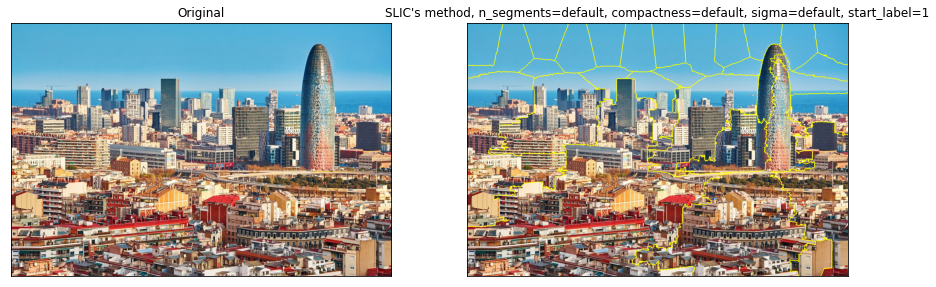

In [7]:
# Your solution here
# Apply SLIC method
segments_slic = slic(barcelona_im, start_label=1)

# Create subplots for Original and SLIC images
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(barcelona_im)
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Show the segmented image
axs[1].imshow(mark_boundaries(barcelona_im, segments_slic))
axs[1].set_title(f"SLIC's method, n_segments=default, compactness=default, sigma=default, start_label={1}")
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


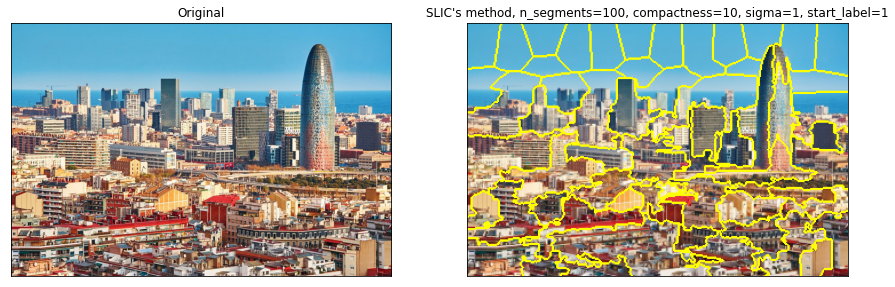

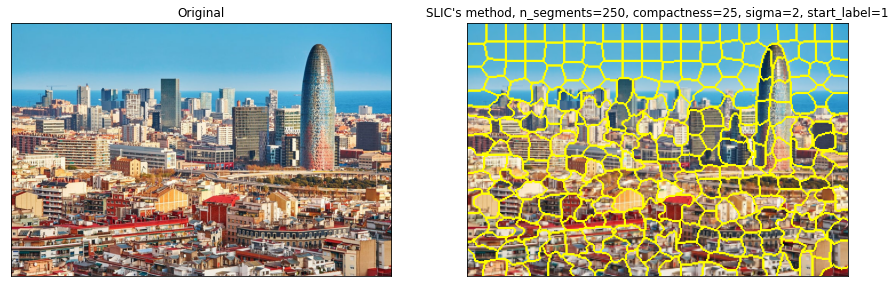

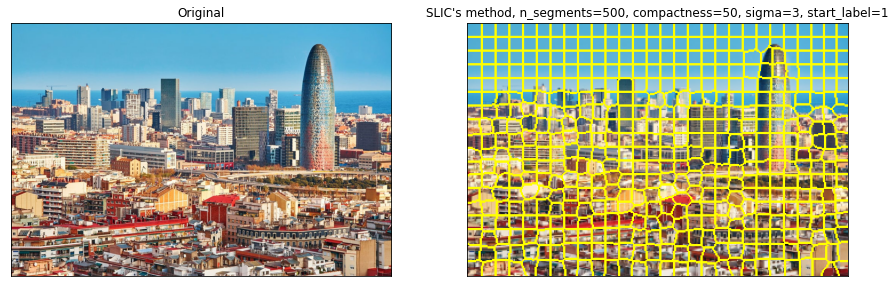

In [8]:
def segments_slic(img, n_segments, compactness, sigma):
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))
    
    # Apply SLIC method
    segments_slic_parameters = slic(resized_image, n_segments=n_segments, compactness=compactness, sigma=sigma, start_label=1)
    
    # Create subplots for Original and SLIC images
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(barcelona_im)
    axs[0].set_title("Original")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    # Show the segmented image
    axs[1].imshow(mark_boundaries(resized_image, segments_slic_parameters))
    axs[1].set_title(f"SLIC's method, n_segments={n_segments}, compactness={compactness}, sigma={sigma}, start_label={1}")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

segments_slic(barcelona_im, 100, 10, 1)
segments_slic(barcelona_im, 250, 25, 2)
segments_slic(barcelona_im, 500, 50, 3)

f) Comment what the algorithm is (in up to 3 lines).

In [7]:
"""
SLIC (Simple Linear Iterative Clustering) is a superpixel segmentation algorithm that efficiently groups pixels into visually homogeneous clusters.
Its advantages include speed and uniform superpixel generation, while sensitivity to initial parameters is a potential drawback.
"""

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm. 

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results. 


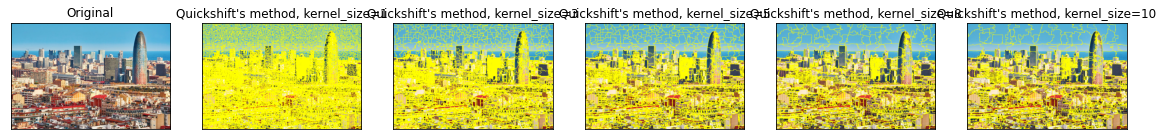

In [9]:
"""
A higher value for the QuickShift algorithm's kernel size parameter typically results in larger and fewer superpixels, as it allows for a broader spatial search for mode shifts.
This can improve segmentation results when dealing with images with large, uniform regions.
Conversely, a lower value leads to smaller and more numerous superpixels, which might be beneficial for capturing finer details in complex images with smaller structures and varying textures.
The optimal choice depends on the specific characteristics of the image being segmented.
"""


# Create an array of kernel_size values to explore
kernel_sizes = [1, 3, 5, 8, 10]

fig, axs = plt.subplots(1, len(kernel_sizes)+1, figsize=(20, 10))

# Show the segmented image
axs[0].imshow(barcelona_im)
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Iterate through different kernel_size values
for i, kernel_size in enumerate(kernel_sizes,1):
    # Segment the image using Quickshift
    segments = quickshift(barcelona_im, kernel_size=kernel_size)

    # Show the segmented image
    axs[i].imshow(mark_boundaries(barcelona_im, segments))
    axs[i].set_title(f"Quickshift's method, kernel_size={kernel_size}")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

h) Comment what the algorithm is (in up to 3 lines).

In [9]:
"""
QuickShift is a non-parametric image segmentation algorithm that adapts to varying data densities without predefined parameters.
Its advantages include parameter-free operation and efficient handling of density variations, but it may lead to over-segmentation in certain scenarios.
"""

### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to: 
1) Original image
1) Salt and pepper noise version of this image
2) Flipped image (horizontally)
3) Canny edge detector result of this image. 

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots. 

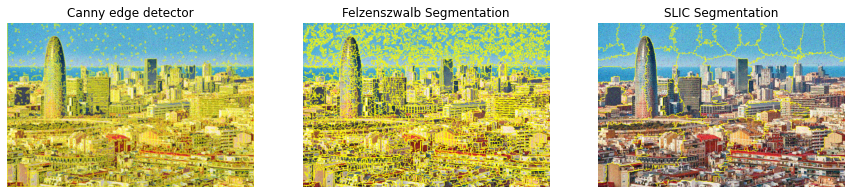

In [15]:
"""
Q1. Yes, image transformations can affect the results of image segmentation algorithms.
This is because image transformations can change the characteristics of the image, such as the intensity values of the pixels, the texture of the image, and the spatial relationships between the pixels.
These changes can affect the way that the segmentation algorithm interprets the image and can lead to different segmentation results.
Q2. The number of segments can be used as a criterion for the performance of image segmentation algorithms in some cases. For example, if the goal of the segmentation algorithm is to identify a specific number of objects in the image, then the number of segments can be used to measure how well the algorithm achieved this goal.
However, the number of segments is not always a good measure of the performance of image segmentation algorithms.
For example, if the goal of the segmentation algorithm is to produce a segmentation that is accurate with respect to the ground truth segmentation, then the number of segments may not be a good measure of the performance of the algorithm.
This is because the ground truth segmentation may have a different number of segments than the segmentation produced by the algorithm.
"""

# Create a salt and pepper noise version of the image
noisy_img = random_noise(barcelona_im, mode='s&p')

# Create a horizontally flipped version of the image using NumPy
flipped_img = np.fliplr(noisy_img)

# Convert flipped image to gray scale
flipped_gray_img = rgb2gray(flipped_img)

# Apply the Canny edge detector to the flipped image
edges_canny_img = canny(flipped_gray_img, sigma=1.5)

# Apply the best set of parameters for Felzenszwalb and SLIC to the flipped image
segments_felzenszwalb = felzenszwalb(flipped_img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(flipped_img, n_segments=100, compactness=10, sigma=1, start_label=1)

# Create subplots for Canny, Felzenszwalb and SLIC
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title("Canny edge detector")
axs[0].imshow(mark_boundaries(flipped_img, edges_canny_img))
axs[0].axis('off')

# Plot Felzenszwalb segmentation for the flipped image
axs[1].set_title("Felzenszwalb Segmentation")
axs[1].imshow(mark_boundaries(flipped_img, segments_felzenszwalb))
axs[1].axis('off')

# Plot SLIC segmentation for the flipped image
axs[2].set_title("SLIC Segmentation")
axs[2].imshow(mark_boundaries(flipped_img, segments_slic))
axs[2].axis('off')

plt.show()

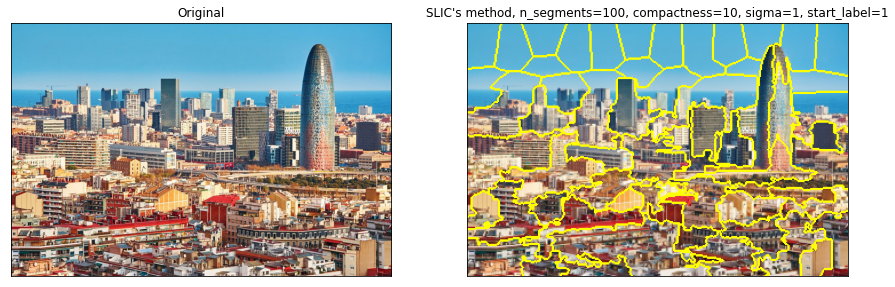

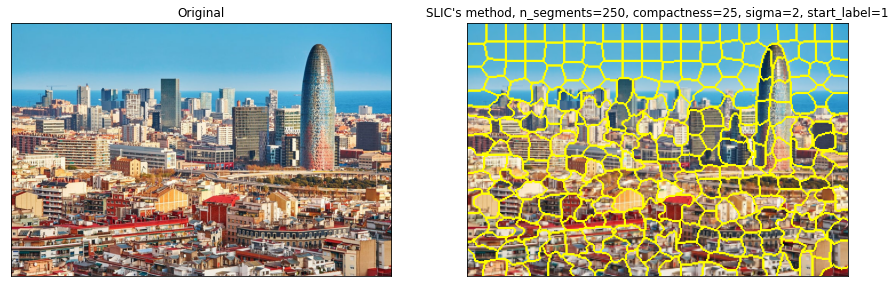

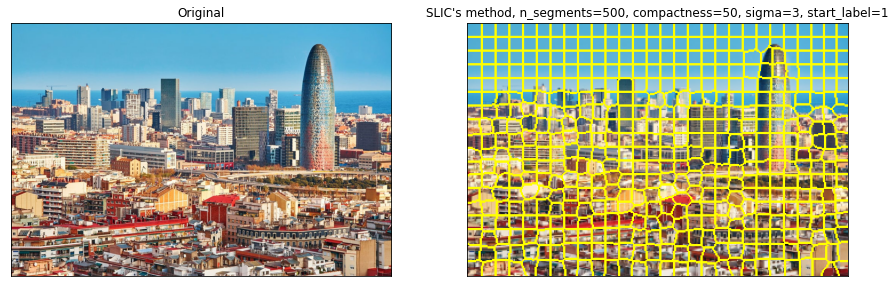

In [ ]:
# Your solution here
def segments_slic(img, n_segments, compactness, sigma):
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))
    segments_slic_parameters = slic(resized_image, n_segments=n_segments, compactness=compactness, sigma=sigma, start_label=1)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(barcelona_im)
    axs[0].set_title("Original")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(mark_boundaries(resized_image, segments_slic_parameters))
    axs[1].set_title(f"SLIC's method, n_segments={n_segments}, compactness={compactness}, sigma={sigma}, start_label={1}")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

segments_slic(barcelona_im, 100, 10, 1)
segments_slic(barcelona_im, 250, 25, 2)
segments_slic(barcelona_im, 500, 50, 3)

- Do the transformations affect the segmentation? Why or why not? 
- Can the number of segments can be used as a criterion for the performance of the algorithms?

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/loro.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter. 

<img src="images_notebook/loro_segmentation.jpg" width=600>

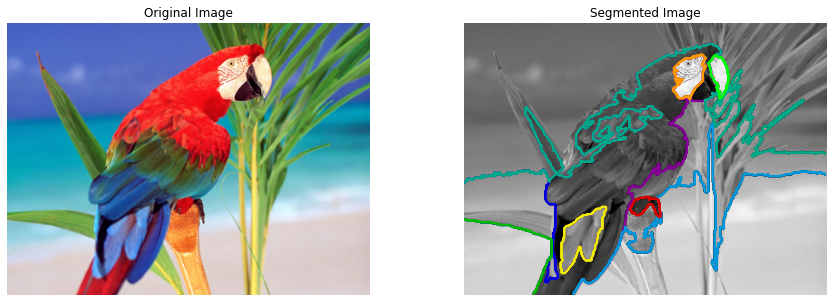

In [2]:

# Load and display the original image
loro_im = io.imread('images_notebook/loro.png')

# Create subplots for Canny, Felzenszwalb and SLIC
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].set_title("Original Image")
axs[0].imshow(loro_im)
axs[0].axis('off')

# Convert the resized image to grayscale
loro_gray_im = rgb2gray(loro_im)
w, h = loro_gray_im.shape

# Convert the image to a floating point array
loro_2d_im = loro_gray_im.reshape((-1, 1))

# Perform hierarchical clustering
connectivity = image.grid_to_graph(w, h)
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward', connectivity=connectivity)

# Fit the clustering algorithm to the 2D data of the image
clustering.fit(loro_2d_im)

# Reshape the labels to the shape of the resized image
loro_segmented_im = np.reshape(clustering.labels_, loro_gray_im.shape)

# Segmented image with the contours
axs[1].imshow(loro_gray_im, cmap=plt.cm.gray)
for l in range(10):
    axs[1].contour(
        loro_segmented_im == l,
        colors=[
            plt.cm.nipy_spectral(l / float(10)),
        ],
    )
axs[1].set_title('Segmented Image')
axs[1].axis("off")

plt.show()

## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


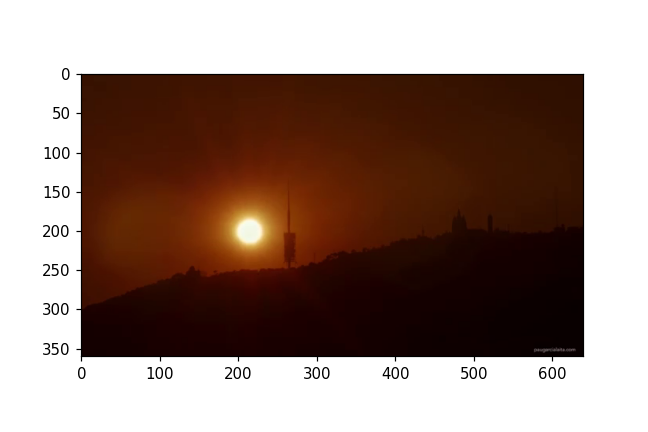

In [3]:
# Your solution here
%matplotlib nbagg

ic = io.ImageCollection('images_notebook/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder


%matplotlib nbagg
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True,cache_frame_data=False, frames=None, repeat=False) # Frames=None to print all frames
plt.show()

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference. 

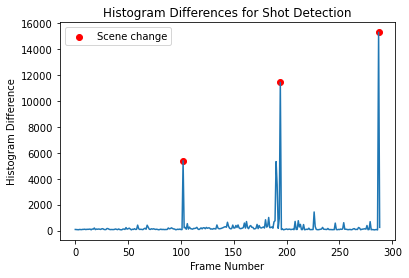

In [4]:
# Function for computing the difference of histogram of an image and the previous one
def compute_hist(im, im_prev, hist_im_prev=None):

    [hist_r, bins_r]=histogram((img_as_float(im)[:,:,0]),64)
    [hist_g, bins_g]=histogram((img_as_float(im)[:,:,1]),64)
    [hist_b, bins_b]=histogram((img_as_float(im)[:,:,2]),64)
    hist_im = np.array(hist_r+hist_g+hist_b)

    if hist_im_prev is None:
        [hist_r, bins_r]=histogram((img_as_float(im_prev)[:,:,0]),64)
        [hist_g, bins_g]=histogram((img_as_float(im_prev)[:,:,1]),64)
        [hist_b, bins_b]=histogram((img_as_float(im_prev)[:,:,2]),64)
        hist_im_prev = np.array(hist_r+hist_g+hist_b)

    hist_diff = np.mean(np.abs(hist_im_prev - hist_im))

    return hist_diff, hist_im_prev


# initialize the data arrays
xdata = []
ydata = []
prev_hist = None

%matplotlib inline

for t in range(len(ic)-1):
    # update the data plot
    y, prev_hist = compute_hist(ic[t+1], ic[t])#, hist_im_prev=prev_hist)
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

fig, ax = plt.subplots(1)
plt.plot(xdata, ydata)

# Determine a threshold (you can adjust this value as needed)
threshold = 5350  # Set your threshold value

# Mark points that exceed the threshold
shot_boundaries = [i for i, y in enumerate(ydata) if y > threshold]
plt.scatter(shot_boundaries, [ydata[i] for i in shot_boundaries], color='red', marker='o', label='Scene change')

# Show the plot
plt.xlabel('Frame Number')
plt.ylabel('Histogram Difference')
plt.legend()
plt.title('Histogram Differences for Shot Detection')
plt.show()

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [5]:
# Example A
def data_gen():
    return enumerate(mean_differences)


<IPython.core.display.Javascript object>


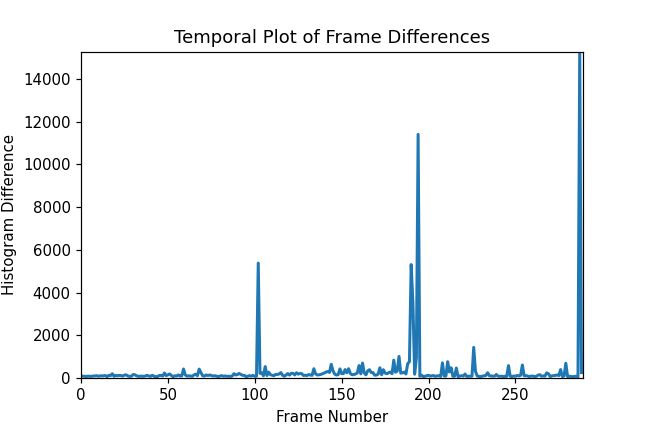

In [6]:
%matplotlib nbagg
mean_differences = np.array(ydata)  # Use the differences from the previous code

# Function for generating data for animation
def data_gen():
    for i, diff in enumerate(mean_differences):
        yield i, diff

# Function to update the plot
def update(frame, data, line):
    y = data[:frame + 1]  # Use all data up to the current frame
    x = np.arange(len(y))
    line.set_data(x, y)
    return line,

# Create a figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, len(mean_differences))  # Adjust the x-axis range
ax.set_ylim(0, max(mean_differences))  # Adjust the y-axis range

# Function to be called by the animation
ani = animation.FuncAnimation(fig, update, frames=len(mean_differences), fargs=(mean_differences, line),
                              blit=True, interval=5, repeat=False, cache_frame_data=False)

plt.xlabel('Frame Number')
plt.ylabel('Histogram Difference')
plt.title('Temporal Plot of Frame Differences')

plt.show()

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


Shot 1: Initial Frame - 0, Final Frame - 102
Shot 2: Initial Frame - 103, Final Frame - 194
Shot 3: Initial Frame - 195, Final Frame - 287


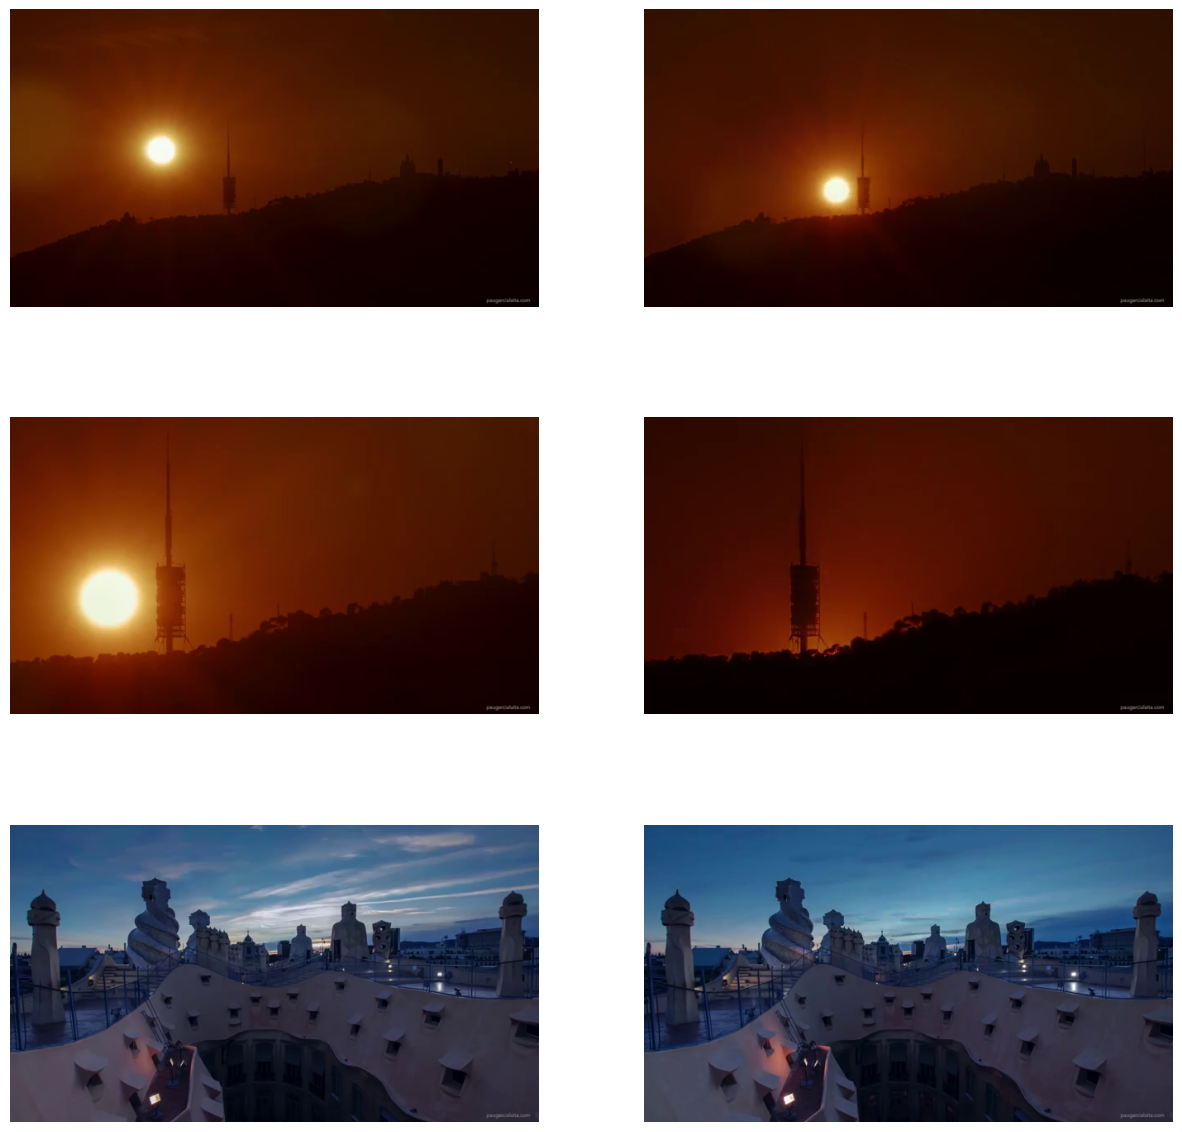

In [62]:
# Your solution here

# Assuming you have obtained the mean_differences array from the previous analysis
mean_differences = np.array(ydata)  # Use the differences from the previous code

# Define a threshold value based on the plot or manually set a suitable value
threshold = 5350  # Set your desired threshold value

# Find the indices where the differences exceed the threshold
shot_boundaries = np.where(mean_differences > threshold)[0]

# Add the start of the first shot to the beginning of the shot list
shots = [-1] + shot_boundaries.tolist()

# Create subplots for the initial and end frames
fig, axs = plt.subplots(len(shots)-1, 2, figsize=(15, 15))

# Extract the start and end frames of each shot based on the detected boundaries
for idx in range(len(shots) - 1):
    start_frame = shots[idx]
    end_frame = shots[idx + 1]

    axs[idx][0].imshow(ic[start_frame+1])
    axs[idx][0].axis('off')
    axs[idx][1].imshow(ic[end_frame])
    axs[idx][1].axis('off')

    print(f"Shot {idx + 1}: Initial Frame - {start_frame+1}, Final Frame - {end_frame}")

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [17]:
"""
The measure used for visually distinguishing shots in the plot is the "Histogram Difference.".
shot boundaries are detected by computing the difference between the histograms of consecutive frames and then identifying points where this difference exceeds a specified threshold.
"""

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [18]:
"""
 While the provided strategy is suitable for detecting global changes in the scene (shot boundaries), it may not be effective for separating and tracking individual objects due to its reliance on global color histograms and the lack of consideration for spatial relationships between pixels.
 For object tracking purposes, alternative methods that incorporate both color and spatial information would be more appropriate.
"""

f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [19]:
"""
The provided histogram difference strategy is better suited for detecting abrupt shot boundaries than capturing continuous transitions. Its focus on global color changes makes it less sensitive to subtle, gradual variations over time. Techniques incorporating spatial and temporal information would be more effective for capturing continuous transitions in video content.
"""

## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

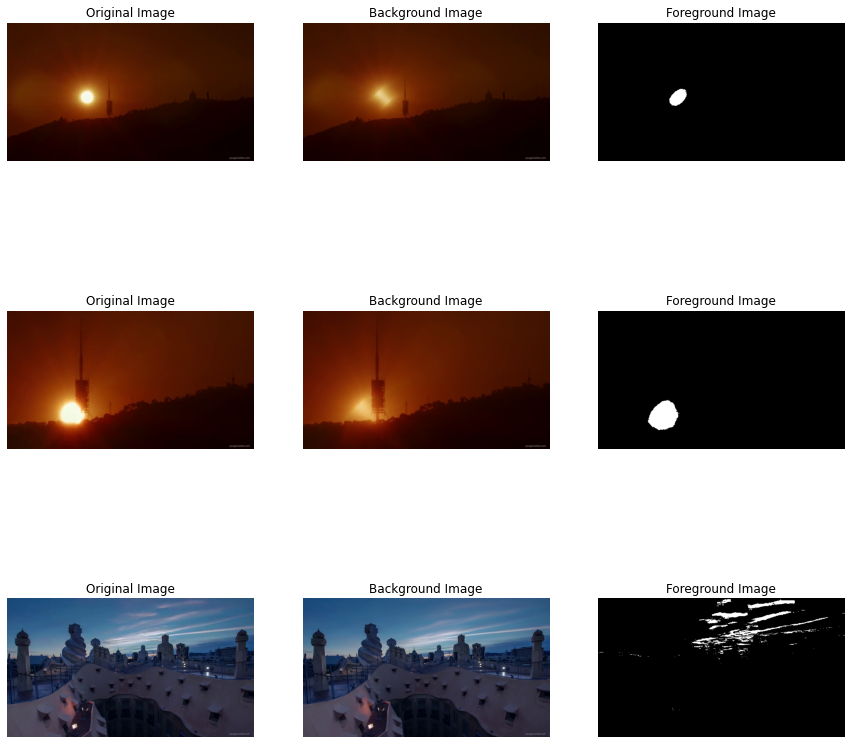

In [23]:
# Your solution here

# Create subplots for the initial and end frames
fig, axs = plt.subplots(len(shots)-1, 3, figsize=(15, 15))

# Define the foreground threshold:
foreground_threshold = 0.9

# Define the function to get the foreground image:
def get_foreground(frame, background, foreground_threshold):
    # Convert to grayscale
    frame_gray = rgb2gray(frame)
    background_gray = rgb2gray(background)

    # Calculate the absolute difference between the frame and the background
    frame_diff = np.abs(frame_gray - background_gray)

    # Apply thresholding using the threshold_otsu method
    thresh_value = threshold_otsu(frame_diff)
    foreground = frame_diff > thresh_value * foreground_threshold

    return img_as_ubyte(foreground)

# Extract the background image using the median filter of the whole sequence:
for idx in range(len(shots) - 1):
    start_frame = shots[idx]
    end_frame = shots[idx + 1]

    frames_array = np.array(ic[start_frame+1:end_frame+1])

    # Calculate the background image using the median of the frames
    background = np.median(frames_array, axis=0).astype(np.uint8)

    # Take the frame:
    frame = ic[(start_frame+1+end_frame+1)//2]

    # Apply the get_foreground funtion to obtain the foreground image:
    foreground = get_foreground(frame, background, foreground_threshold)

    # Show the original image, the background image and the foreground image in a Figure:
    axs[idx][0].set_title("Original Image")
    axs[idx][0].imshow(frame)
    axs[idx][0].axis('off')

    axs[idx][1].set_title("Background Image")
    axs[idx][1].imshow(background)
    axs[idx][1].axis('off')

    axs[idx][2].set_title("Foreground Image")
    axs[idx][2].imshow(foreground, cmap="gray")
    axs[idx][2].axis('off')

b) What do the static background images represent? 

In [21]:
"""
The static background images represent the pixels that are not dynamic in the video, with this pixels we can estimate the background of the video and then subtract it from the original video to obtain the foreground.
"""

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [22]:
"""
If shots are not correctly extracted  it can lead to inaccurate object tracking, disrupted scene understanding, poor video summarization, and complications in video editing. Conversely, identifying too many shots can increase computational complexity, result in redundant information, and overwhelm users, impacting the efficiency of algorithms and user experience.
"""

d) What happens if you subtract the background image from the original one?

In [23]:
"""
Subtracting the background image from the original one highlights changes in the scene, isolating moving objects.
This process creates a binary mask, aiding in the detection of foreground elements.
It improves object recognition by simplifying the scene, enabling more accurate analysis in computer vision tasks.
However, effectiveness depends on factors like background stability and lighting conditions.
"""

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [24]:
"""
The algorithm works well when the background is static, the camera is stationary, and the lighting conditions are consistent.
Does not if the background is dynamic, or there are complex scenes like scenes with heavy occlusions, shadows, and reflections.

Some applications of background subtraction are:
- Object detection and tracking
- Video surveillance
- Gesture recognition
"""

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it. 

<IPython.core.display.Javascript object>


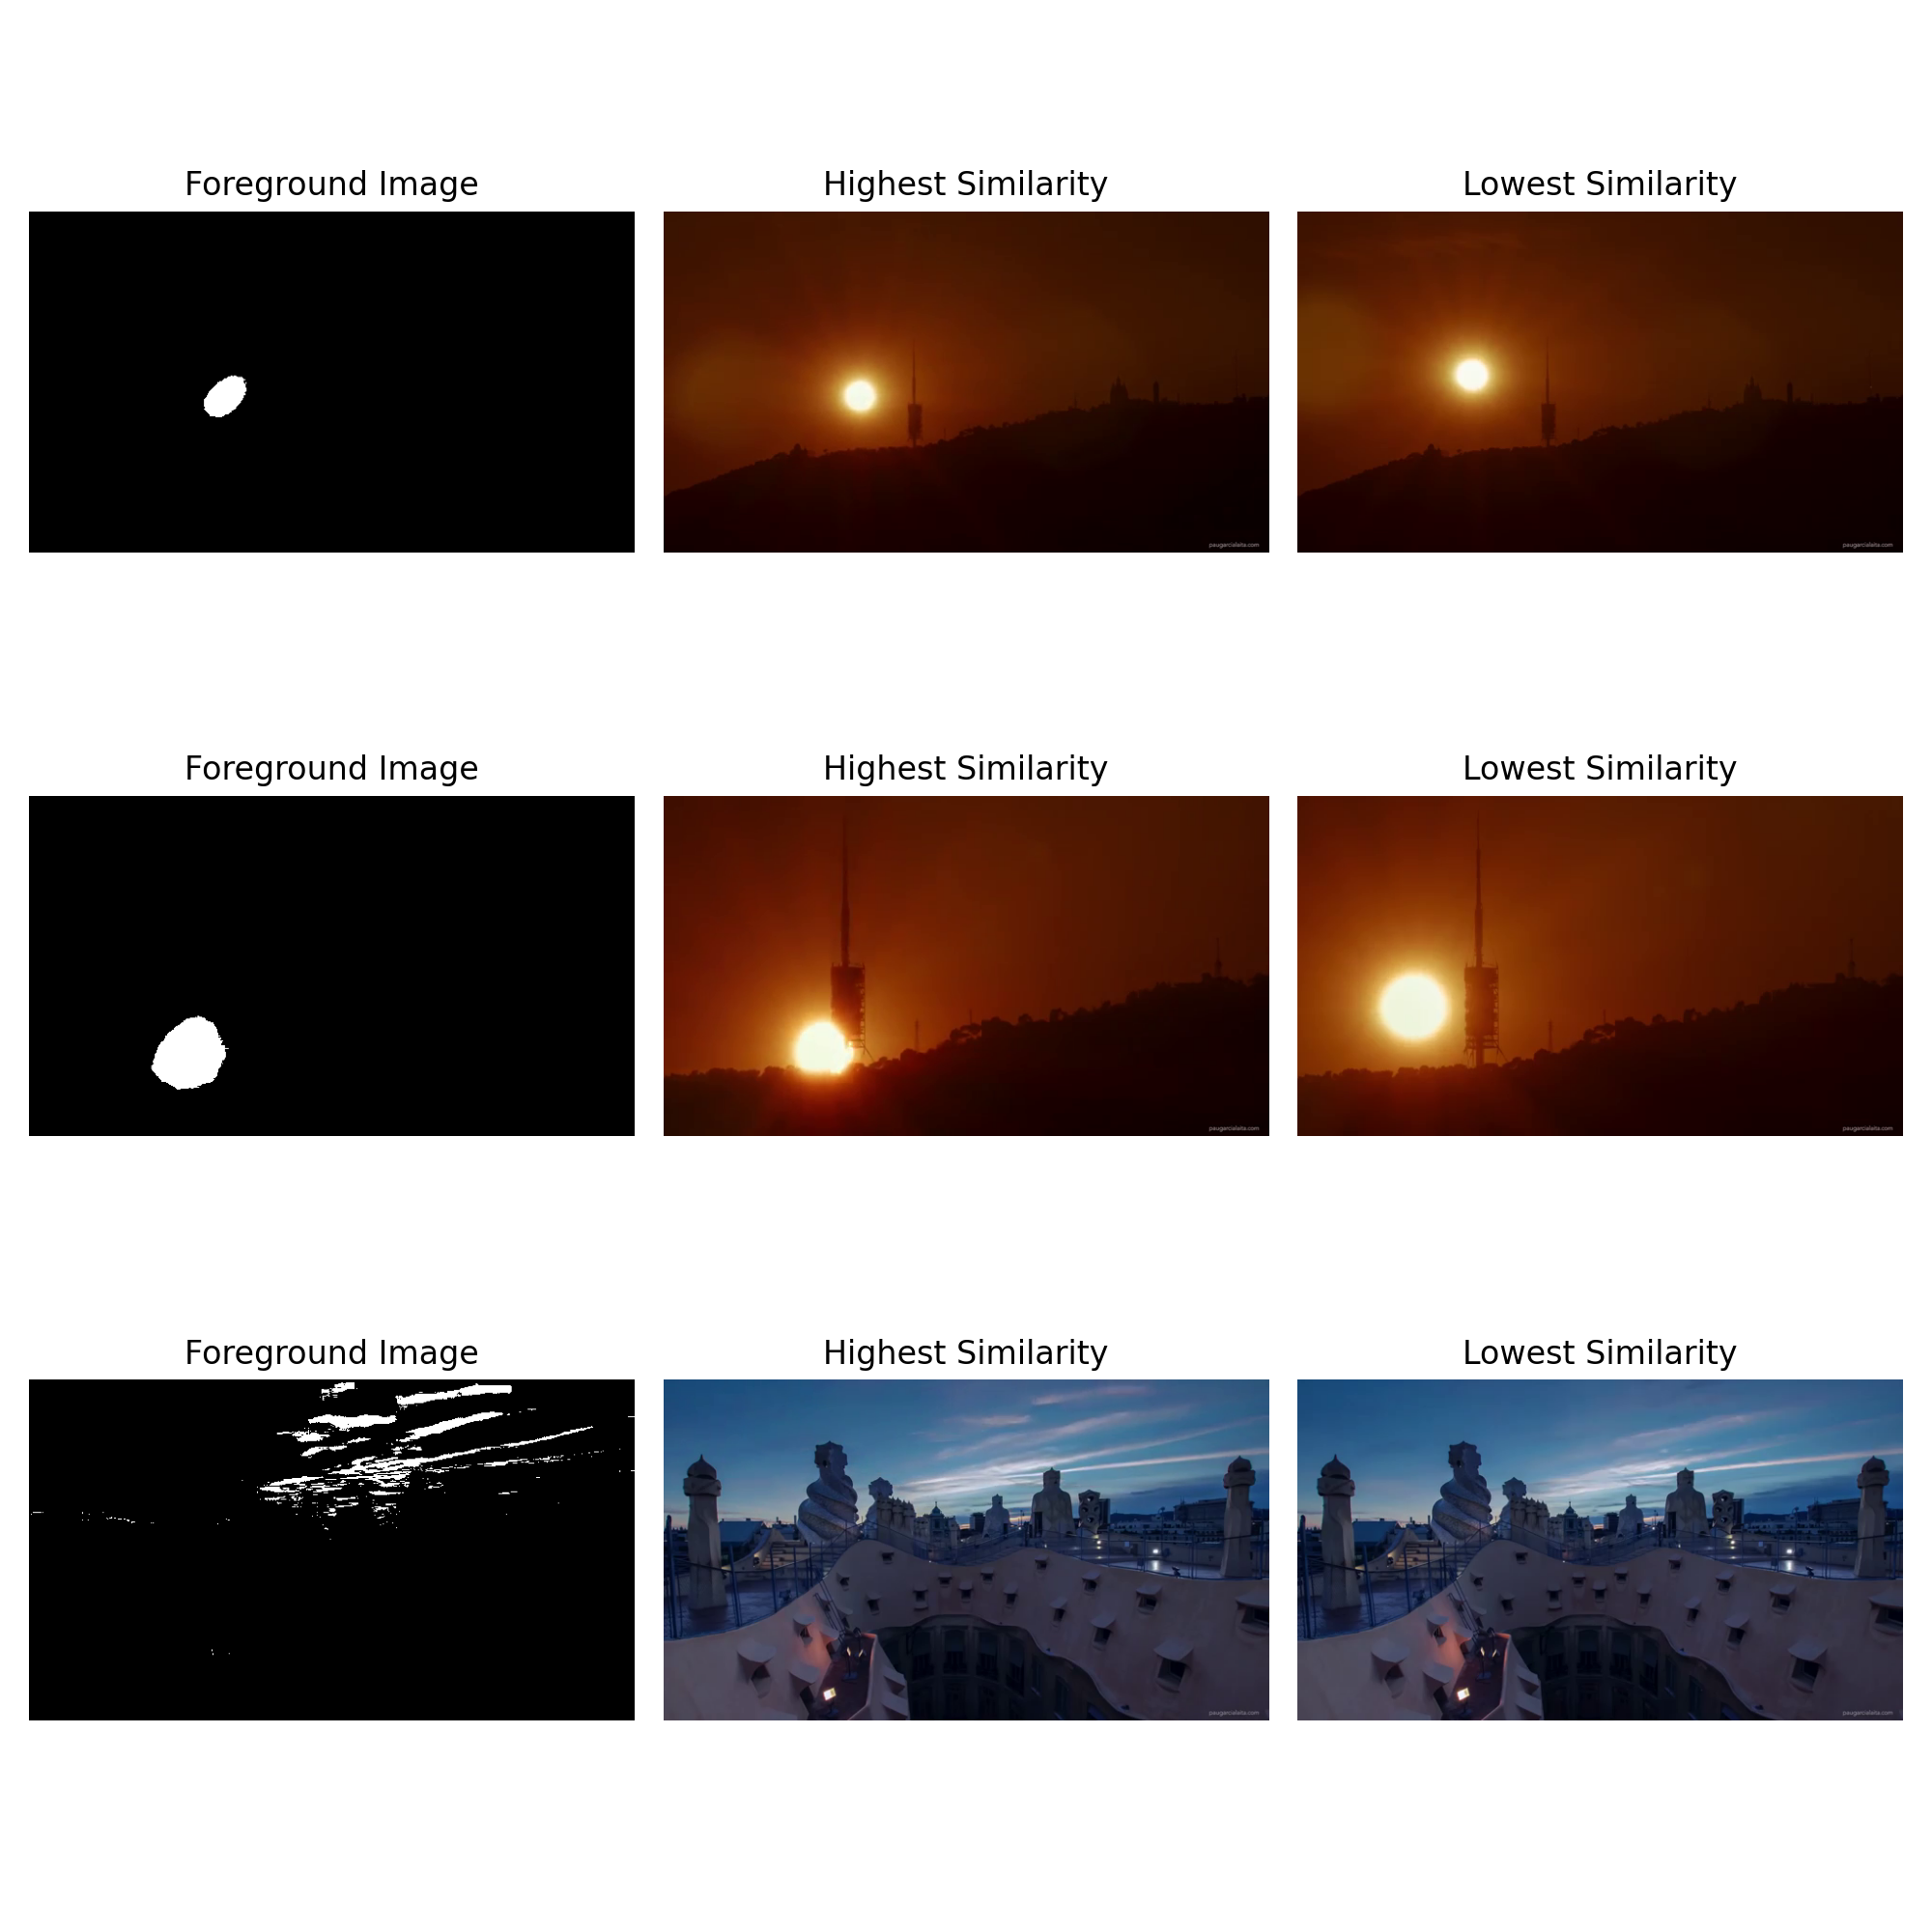

In [80]:
from skimage.metrics import structural_similarity as ssim

# Function to compute SSIM between two images
def compute_ssim(img1, img2):
    return ssim(img1, img2, multichannel=True)

# Define the foreground threshold:
foreground_threshold = 0.9

# Define the function to get the foreground image:
def get_foreground(frame, background, foreground_threshold):
    frame_gray = rgb2gray(frame)
    background_gray = rgb2gray(background)
    frame_diff = np.abs(frame_gray - background_gray)
    thresh_value = threshold_otsu(frame_diff)
    foreground = frame_diff > thresh_value * foreground_threshold
    return img_as_ubyte(foreground)

# Your solution here
fig, axs = plt.subplots(len(shots)-1, 3, figsize=(10, 10))

for idx in range(len(shots) - 1):
    start_frame = shots[idx]
    end_frame = shots[idx + 1]

    frames_array = np.array(ic[start_frame+1:end_frame+1])
    background = np.median(frames_array, axis=0).astype(np.uint8)
    frame = ic[(start_frame+1+end_frame+1)//2]
    foreground = get_foreground(frame, background, foreground_threshold)

    # Calculate SSIM for each frame in the scene
    similarities = []
    for frame_index, scene_frame in enumerate(frames_array):
        similarity = compute_ssim(foreground, get_foreground(scene_frame, background, foreground_threshold))
        similarities.append((frame_index, similarity))

    # Sort similarities to find highest and lowest
    similarities.sort(key=lambda x: x[1])


    axs[idx][0].set_title("Foreground Image")
    axs[idx][0].imshow(foreground, cmap="gray")
    axs[idx][0].axis('off')

    # Display highest similarity frame
    axs[idx][1].set_title("Highest Similarity")
    axs[idx][1].imshow(frames_array[similarities[-1][0]])
    axs[idx][1].axis('off')

    # Display lowest similarity frame
    axs[idx][2].set_title("Lowest Similarity")
    axs[idx][2].imshow(frames_array[similarities[0][0]])
    axs[idx][2].axis('off')

plt.tight_layout()
plt.show()

"""
Structural Similarity Index (SSIM) is chosen as a metric because it quantifies the similarity between two images by assessing luminance, contrast, and structure.
It provides a comprehensive measure of perceptual image quality, considering both global and local features.
Higher SSIM values indicate greater similarity, making it a reliable metric for evaluating the visual fidelity of image processing or compression algorithms.
Its incorporation of human visual perception aspects makes it suitable for applications where preserving image quality is crucial.
"""
